# CSE 5243 - Introduction to Data Mining
## Homework 4: Clustering
- Semester: Spring 2023
- Instructor: Tom Bihari
- Section: Wednesday/Friday 9:35AM
- Student Name: Richard Zhou
- Student Email: zhou.3153@osu.edu
- Student ID: 123456789

Template Version V6.
***

***
# Section: Overview

### Objectives:

In this lab, you will perform clustering on three datasets.  Your will choose suitable clustering algorithms, evaluate them on the datasets, and compare their performance.

The objectives of this assignment are:
1.	Understand how to select and evaluate suitable off-the-shelf clustering algorithms based on the characteristics of a dataset and the outcomes you need.
2.	Understand how to tune and evaluate a clustering algorithm to achieve good performance.

### Datasets:

- The file **small_Xydf.csv** is a two-dimensional dataset with 200 records.  It contains columns X0, X1, and y.  The y column is the actual cluster number that was produced by the dataset generation algorithm.  Do not use it for the clustering algorithm.  It will be used to evaluate your clustering algorithm below.

- The file **large1_Xydf.csv** is a two-dimensional dataset with 3000 records.  It contains columns X0, X1, and y.  The y column is the actual cluster number that was produced by the dataset generation algorithm.  Do not use it for the clustering algorithm.  It will be used to evaluate your clustering algorithm below.

- The file **large2_Xydf.csv** is a two-dimensional dataset with 3000 records.  It contains columns X0, X1, and y.  The y column is the actual cluster number that was produced by the dataset generation algorithm.  Do not use it for the clustering algorithm.  It will be used to evaluate your clustering algorithm below.

### Approach:

This homework makes use of the Clustering Algorithms offered by the SciKitLearn Library.  Study the information at https://scikit-learn.org/stable/modules/clustering.html.  Follow the guidance in the individual sections below.

### Collaboration:

For this assignment, you should work as an individual. You may informally discuss ideas with classmates, to get advice on general Python usage, etc., but your work should be your own.  Please make use of Microsoft Teams!

### What You Need to Turn In:

1.	Code
-	For this homework, the code is the Jupyter Notebook.  Use the provided Jupyter Notebook template, and fill in the appropriate information.
-	This homework requires you to use clustering algorithms in the SciKitLearn library.  You also may use common Python libraries for I/O, data manipulation, data visualization, etc. (e.g., NumPy, Pandas, MatPlotLib,…).  You may not use library operations that perform, in effect, the entire “core” computations for this homework. (e.g., If you happen to find a single function on the web that does essentially *all* of a major portion of the homework, you may not use it.)  When in doubt, ask the grader or instructor.
-	The code must be written by you, and any significant code snips you found on the Internet and used to understand how to do your coding for the core functionality must be attributed.  (You do not need to attribute basic functionality – matrix operations, IO, etc.)
-	The code must be commented sufficiently to allow a reader to understand the algorithm without reading the actual Python, step by step.
-	When in doubt, ask the grader or instructor.

2.	Written Report
-	For this homework, the report is the Jupyter Notebook.  The report should be well-written.  Please proof-read and remove spelling and grammar errors and typos.
-	The report should discuss your analysis and observations. Key points and findings must be written in a style suitable for consumption by non-experts.  Present charts and graphs to support your observations. If you performed any data processing, cleaning, etc., please discuss it within the report.

### How to Turn In Your Work on Carmen:

**Please follow these instructions exactly** - it helps the grading process.  If you have questions, please ask.  Submit your Jupyter Noebook to Carmen - do not ZIP or PDF it. You do not need to include the input data.

### Grading:

0.	Overall readability and organization of your report (10%) - Is it well organized and does the presentation flow in a logical manner; are there many grammar and spelling mistakes; do the charts/graphs relate to the text, etc.
1.	Evaluation of the KNN Clustering Algorithm on the Small Dataset (15%) – Is your configuration sound?  Have you made an effort to tune the algorithm for good performance?  Are your analyses and evaluations sound, and supported by suitable statistics and/or visualizations?
2.	Evaluation of the KNN Clustering Algorithm on the Large1 Dataset (15%) – Is your configuration sound?  Have you made an effort to tune the algorithm for good performance?  Are your analyses and evaluations sound, and supported by suitable statistics and/or visualizations?
3.	Evaluation of the KNN Clustering Algorithm on the Large2 Dataset (15%) – Is your configuration sound?  Have you made an effort to tune the algorithm for good performance?  Are your analyses and evaluations sound, and supported by suitable statistics and/or visualizations?
4.	Evaluation of the Second Clustering Algorithm on the Large2 Dataset (15%) – Is your choice of algorithm and your configuration sound?  Have you made an effort to tune the algorithm for good performance?  Are your analyses and evaluations sound, and supported by suitable statistics and/or visualizations?
5.	Evaluation of the Third Clustering Algorithm on the Large2 Dataset (15%) – Is your choice of algorithm and your configuration sound?  Have you made an effort to tune the algorithm for good performance?  Are your analyses and evaluations sound, and supported by suitable statistics and/or visualizations?
6.	Comparison of the Three Clustering Algorithms (10%) - Is the comparison sound?  Did you choose a specific clustering algorithm as best and explain why?
7.	Conclusions (5%) – Did you document your overall insights? 

### Instructions and Helpful Hints:
- Consider putting all of your "discussion" text in markdown cells, not inline with code. That gives you more control over formatting. Markdown cheat sheet: https://www.markdownguide.org/cheat-sheet
- Consider creating re-usable functions for some common operations - you will be doing the same sorts of things multiple times below.
- Explain what you are doing, and why.  Explain what you found out or learned.
- *Make sure you run your entire workbook before handing it in, so the output cells are populated.*
- Follow the Section structure as much as possible - put your content where it is requested, so we can find your answers.
- If you have questions on expectations or need clarification or guidance, please ask.  Post to Teams if it is a general question, so everyone benefits.

### References and Acknowledgements:

1.	https://scikit-learn.org/stable/modules/classes.html#module-sklearn.cluster
2.	https://scikit-learn.org/stable/modules/clustering.html
3.	https://docs.python.org/3/library/time.html
4.	https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.linear_sum_assignment.html
5.	https://gist.github.com/siolag161/dc6e42b64e1bde1f263b (using Hungarian Algorithm to match cluster labels - this is just an example)
6.	https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html (note that this is **mean** squared error)
***

***
# Section: Setup
- Add any needed imports, helper functions, etc., here.
***

In [90]:
# Import libraries
import pandas as pd
import numpy as np
from scipy.spatial import distance
from scipy.spatial.distance import cdist
from sklearn import cluster
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
import time
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
import warnings

warnings.filterwarnings('ignore')

#np.set_printoptions(threshold=np.inf)
np.set_printoptions(linewidth=120)

In [91]:
# HELPER FUNCTION - provided to you.  You may use this function or create your own visualizations.
def plot_clusters(title, X, y, size):
    import matplotlib.pyplot as plt
    plt.figure(figsize=(size,size))
    plt.title(title)
    plt.xlabel("X0") 
    plt.ylabel("X1")
    plt.scatter(X[:, 0], X[:, 1], s = 40, c = y[:]) 
    plt.show()
    plt.clf()

In [92]:
# HELPER FUNCTION - provided to you.  You may use this function or create your own.
def remap_cluster_labels(true_y, pred_y):
    # Rearrange the predicted cluster labels so they best match the true ones.
    # This function takes the true and predicted labels and returns the remapped predicted labels.
    # Situation: A clustering algorithm returns a set of cluster labels.  These labels typically will not be the same as the
    # true cluster labels (because the algorithm does not know anything about the true labels).  For example, the algorithm
    # may return (2,1,2,0,1,0,...) while the true labels are (0,2,0,1,2,1,...). Therefore it is necessary remap 2->0, 1->2,
    # and 0->1 when evaluating the quality of the algorithm.
    # Note: This code has not been tested for cases where there are negative cluster numbers (e.g., -1 for DbScan)
    #       or for cases where the true_y and pred_y matrices are of different lengths.
    # https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.linear_sum_assignment.html
    from scipy.optimize import linear_sum_assignment

    conf_mat = confusion_matrix(true_y, pred_y)  #SciKitLearn convention is rows are true labels, cols are predicted labels
    
    # Find the optimal remapping of labels, so the predicted labels best match the true labels.
    # col_index is the predicted label; row_index is the true label to change it to.
    
    # Negate the costs so maximizing the assignment minimizes the mismatches
    row_index, col_index = linear_sum_assignment(conf_mat.max()-conf_mat)

    # Remap the predicted labels.
    new_pred_y = np.zeros(len(pred_y))
    for r in range(0,len(row_index)):
        old = col_index[r]  # the predicted y's
        new = row_index[r]  # remap to the corresponding true y's
        new_pred_y[pred_y == old] = new

    return new_pred_y  # return the remapped labels

In [93]:
# # SUGGESTION - consider creating functions like these, if you choose.
# def compute_single_sse(my_df):  # For a Pandas DataFrame - Columns are X0, X1
#     ...
#     return my_SSE

# def compute_all_sse(my_df):  # For a Pandas DataFrame - Columns are X0, X1, y
#     ...
#     return sum_WSS, overall_SSE-sum_WSS, overall_SSE    #Total (overall) SSE is the sum of BSS and WSS

# def compute_all_sse_from_Xy(X, y):  # For NumPy arrays
#     ...
#     return compute_all_sse(my_df)

In [94]:
# SUGGESTION - consider creating a function to print the evaluation results of the clustering, if you choose.
def print_evaluation_results(title_string, show_true, show_pred, X, true_y, pred_y, running_time):
    # Print plots, WSS, BSS, total SSE, accuracy, confusion matrix, classification report, accuracy, running time, etc.
    # ...
    print(title_string)

This code is used to evaluate and show the data and analysis of the respective clustering method. First it uses the kmeans from scikit with many random states nad in order to calculate the runtime of the method. Next the data is shown in a plot and from there, I calculate the WSS, BSS, and TSS using the given equations from class

In [95]:
def evaluate_clustering(X, true_y, n_clusters):
    start_time = time.time()
    kmeans = KMeans(n_clusters=n_clusters, random_state=42).fit(X)
    end_time = time.time()
    labels = kmeans.labels_

    fig, ax = plt.subplots(figsize=(10, 6))
    ax.scatter(X[:, 0], X[:, 1], c=labels, cmap='rainbow')
    ax.set_title(f'KMeans Clustering (n_clusters={n_clusters})')
    plt.show()

    wss = kmeans.inertia_
    ssd_list = []
    for i in range(n_clusters):
        cluster_center = kmeans.cluster_centers_[i, :]
        data_points_in_cluster = X[labels == i, :]
        ssd = np.sum((data_points_in_cluster - cluster_center) ** 2)
        ssd_list.append(ssd)
        
    bss = np.sum(ssd_list)
    tss = np.sum((X - np.mean(X, axis=0)) ** 2)
    sse = tss - bss

    acc = accuracy_score(true_y, labels)
    cm = confusion_matrix(true_y, labels)
    cr = classification_report(true_y, labels)
    runtime = end_time - start_time

    print('Number of clusters: ' + str(n_clusters))
    print('Within-cluster sum of squares (WSS): ' + str(wss))
    print('Between-cluster sum of squares (BSS): ' + str(bss))
    print('Total sum of squares (TSS): ' + str(tss))
    print('Total sum of squared errors (SSE): ' + str(sse))
    print('Accuracy: ' + str(acc))
    print('Confusion matrix:\n', cm)
    print('Classification report:\n', cr)
    print('Running time: ' + str(runtime) + ' seconds')


***
# Section: 1 - Evaluate the **K-Means** Algorithm on the **Small** Dataset
***

***
## Section: 1.1 - Calculate True Cluster Measures
- Given that you know the true clusters (from column y in the original data), compute the true within-cluster WSS (also called “SSE” in the slides), the between-cluster BSS, and the Total SSE (WSS+BSS).
- Print all of the evaluation results.
***

In [96]:
small_data = pd.read_csv('../Homework4/small_Xydf.csv')
X = small_data[['X0','X1']].to_numpy()
true_y = small_data['y'].to_numpy()

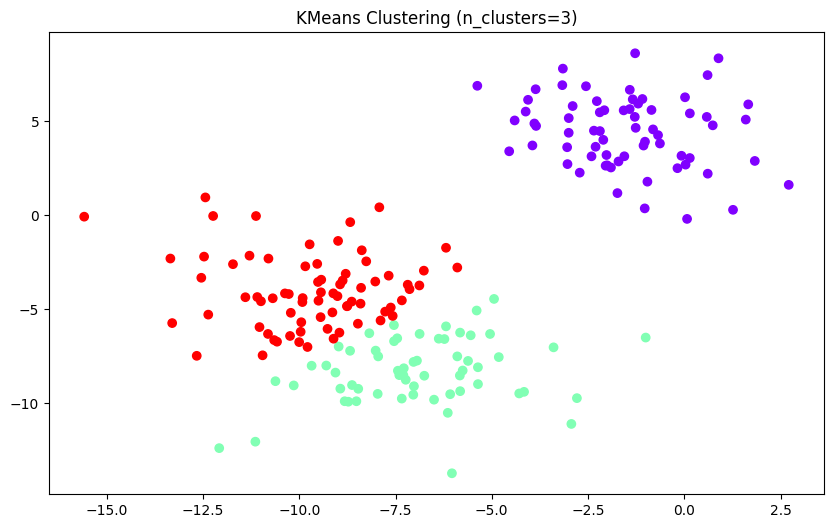

Number of clusters: 3
Within-cluster sum of squares (WSS): 1368.7518425244436
Between-cluster sum of squares (BSS): 1368.7518425244436
Total sum of squares (TSS): 9158.815061081501
Total sum of squared errors (SSE): 7790.063218557058
Accuracy: 0.415
Confusion matrix:
 [[67  0  0]
 [ 0  5 62]
 [ 0 55 11]]
Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        67
           1       0.08      0.07      0.08        67
           2       0.15      0.17      0.16        66

    accuracy                           0.41       200
   macro avg       0.41      0.41      0.41       200
weighted avg       0.41      0.41      0.41       200

Running time: 0.042000532150268555 seconds


In [97]:
evaluate_clustering(X, true_y, n_clusters=3)

***
## Section: 1.2 - Configure and Run the SciKitLearn K-Means Algorithm
- Explain all configuration parameter values you chose, and why you chose them.
- Run your algorithm for K=2, 3, 4.
- For each run:
  - Compute the WSS, BSS, and Total SSE (WSS+BSS), and compute the running time (see Python Time reference – see %%time, time.process_time(), etc.).
    Create a scatterplot, overlaying the true cluster with the cluster produced by your algorithm, or alternatively, create two separate scatterplots.
  - Create a cross tabulation matrix (i.e., confusion matrix) comparing the true and assigned clusters, and the basic measures (precision, recall, F1, accuracy, etc. - see classification_report). - Explain all configuration parameter values you chose, and why you chose them.
Note that you may need to "match up" the true and assigned cluster labels.  See the linear-sum-assignment and Hungarian algorithm references, for example.
***

The parameters I chose are n_clusters, random_state, and cmap. n_clusters is the amount of clusters that the classifer will classify into and the reason is because it is based off of the data trying to optimize what is best. Randoms_state is set to 42 because this would allow for the random number generator to generate the same state every time for output purposes. The reason for using this is to set a random seed which allows for the data to be easily printed again everytime even though the generator is "random". Lastly, the cmap is just the colors that the data will output as.

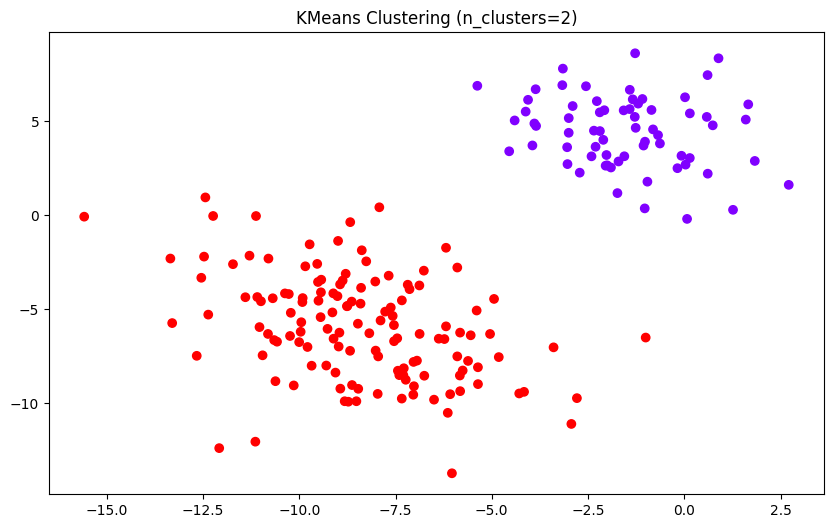

Number of clusters: 2
Within-cluster sum of squares (WSS): 2222.184961433211
Between-cluster sum of squares (BSS): 2222.1849614332114
Total sum of squares (TSS): 9158.815061081501
Total sum of squared errors (SSE): 6936.63009964829
Accuracy: 0.67
Confusion matrix:
 [[67  0  0]
 [ 0 67  0]
 [ 0 66  0]]
Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        67
           1       0.50      1.00      0.67        67
           2       0.00      0.00      0.00        66

    accuracy                           0.67       200
   macro avg       0.50      0.67      0.56       200
weighted avg       0.50      0.67      0.56       200

Running time: 0.039002418518066406 seconds


In [98]:
evaluate_clustering(X, true_y, n_clusters=2)

Here the X, and try_y remain the same as the true values and the data set but what is different is the number of clusters. Here we can see that being 2 and with that they are cluster round (0,5) and(-10,-5). The reason for this is to see a separation where we do see two clusters without the color. On top of this we see a 67% accuracy which is not very good. The WSS and BSS are both the same which means that the data points in each cluster are similar to each other.This means the clustering algorithm was not that effective.

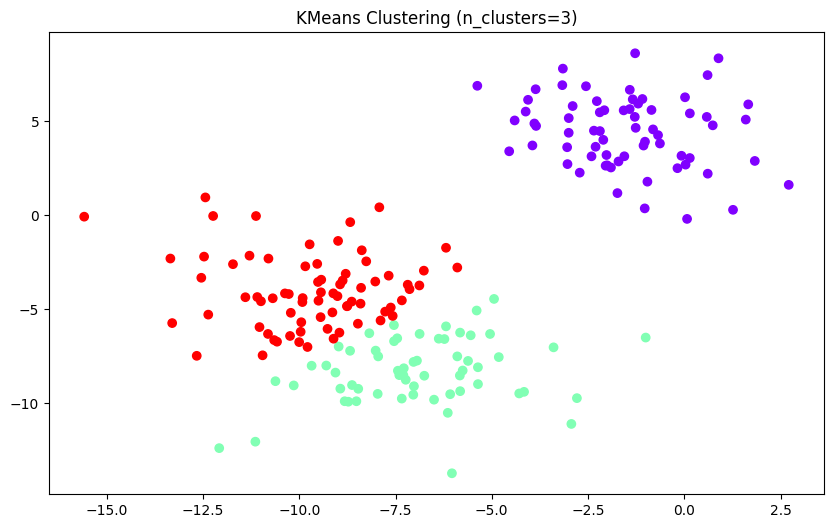

Number of clusters: 3
Within-cluster sum of squares (WSS): 1368.7518425244436
Between-cluster sum of squares (BSS): 1368.7518425244436
Total sum of squares (TSS): 9158.815061081501
Total sum of squared errors (SSE): 7790.063218557058
Accuracy: 0.415
Confusion matrix:
 [[67  0  0]
 [ 0  5 62]
 [ 0 55 11]]
Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        67
           1       0.08      0.07      0.08        67
           2       0.15      0.17      0.16        66

    accuracy                           0.41       200
   macro avg       0.41      0.41      0.41       200
weighted avg       0.41      0.41      0.41       200

Running time: 0.04399585723876953 seconds


In [99]:
evaluate_clustering(X, true_y, n_clusters=3)

Here the X, and try_y remain the same as the true values and the data set but what is different is the number of clusters. Here we can see that being 3 and seeing one large cluster separated by space and the two other clusters being combined but split in half. We can see a lower WSS which is good for the cluster where we can see that the clusters are denser. But the accuracy is much lower with 41% as to 67% with two clusters

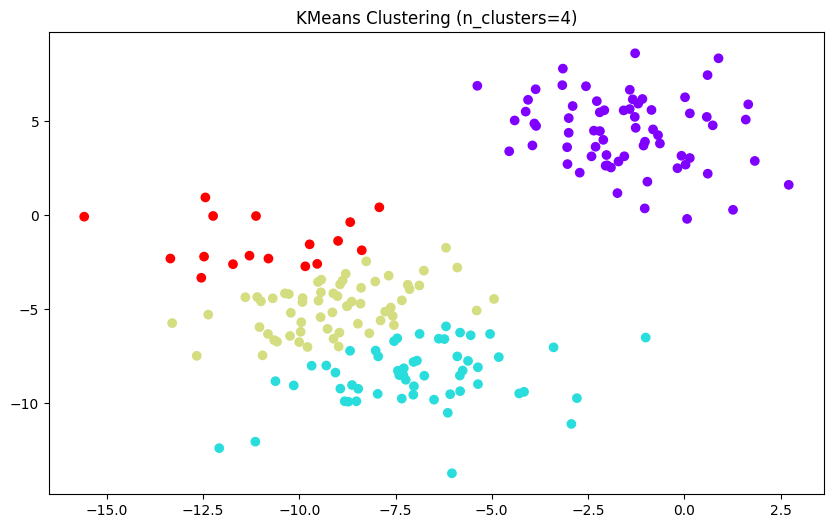

Number of clusters: 4
Within-cluster sum of squares (WSS): 1171.092689589618
Between-cluster sum of squares (BSS): 1171.0926895896182
Total sum of squares (TSS): 9158.815061081501
Total sum of squared errors (SSE): 7987.722371491883
Accuracy: 0.43
Confusion matrix:
 [[67  0  0  0]
 [ 0  4 46 17]
 [ 0 51 15  0]
 [ 0  0  0  0]]
Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        67
           1       0.07      0.06      0.07        67
           2       0.25      0.23      0.24        66
           3       0.00      0.00      0.00         0

    accuracy                           0.43       200
   macro avg       0.33      0.32      0.33       200
weighted avg       0.44      0.43      0.43       200

Running time: 0.04899859428405762 seconds


In [100]:
evaluate_clustering(X, true_y, n_clusters=4)

Here the X, and try_y remain the same as the true values and the data set but what is different is the number of clusters. Here we can see that being 4 clusters and there is still the large one in the top right but the cluster in the bottom left has been split into 3. The accuracy of this classification is much lower with 43% which is not good. The WSS is lower here but also the BSS which means that the data is closer together. With both values being equal there is not as much separation that they have with each other.

***
## Section: 1.3 - Record Your Observations
- What do you observe or conclude from these experiments?
- Which is your “preferred” clustering (K value in particular), and why?
- Support this with statistics and/or graphs.
***

From these experiments I observe that with this data specifically, the more clusters that there are, the lower the accuracy gets but the WSS and BSS also get lower. This means that the data in each cluster gets more clustered which makes sense but they are also show that there is less separation between the different clusters. On top of this we can see how with two clusters vs 3 or 4 it was the most distinct. My most preferred clustering was with 2. It was the most accurate with 67% and also had the best variance and distinction between the clusters.

***
# Section: 2 - Evaluate the **K-Means** Algorithm on the **Large1** Dataset
***

***
## Section: 2.1 - Calculate True Cluster Measures
- Given that you know the true clusters (from column y in the original data), compute the true within-cluster WSS (also called “SSE” in the slides), the between-cluster BSS, and the Total SSE (WSS+BSS).
***

Here I used the code evaluate_clustering because that def is the one that evaluates K-means and uses the X which is just the data and the true_y which is the true values and takes in n amount of clusters. For this first call I just used Four in order to demonstrate how the evaluation will look like. On top of this, 4 had the higest accuracy.

In [121]:
large_data1 = pd.read_csv('../Homework4/large1_Xydf.csv')
X = large_data1[['X0','X1']].to_numpy()
true_y = large_data1['y'].to_numpy()

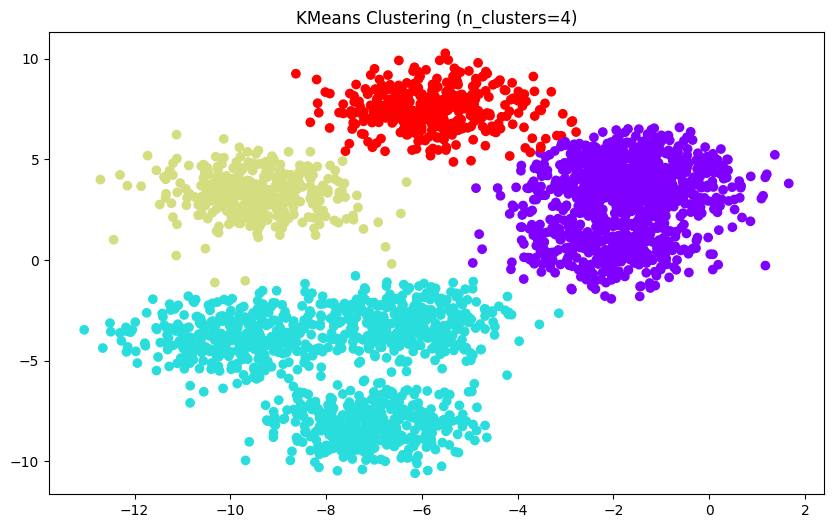

Number of clusters: 4
Within-cluster sum of squares (WSS): 17039.11629612675
Between-cluster sum of squares (BSS): 17039.11629612675
Total sum of squares (TSS): 108019.19352184644
Total sum of squared errors (SSE): 90980.07722571968
Accuracy: 0.24666666666666667
Confusion matrix:
 [[367   0   0   8   0   0   0   0]
 [  0 373   2   0   0   0   0   0]
 [  0 375   0   0   0   0   0   0]
 [  0 373   2   0   0   0   0   0]
 [375   0   0   0   0   0   0   0]
 [371   0   0   4   0   0   0   0]
 [  0   0   1 374   0   0   0   0]
 [  0   0 374   1   0   0   0   0]]
Classification report:
               precision    recall  f1-score   support

           0       0.33      0.98      0.49       375
           1       0.33      0.99      0.50       375
           2       0.00      0.00      0.00       375
           3       0.00      0.00      0.00       375
           4       0.00      0.00      0.00       375
           5       0.00      0.00      0.00       375
           6       0.00      0.00 

In [124]:
evaluate_clustering(X, true_y, n_clusters=4)

Here the X, and try_y remain the same as the true values and the data set but what is different is the number of clusters. Here we can see that being 4 clusters and 5 distinct little blobs. THe classifier put the bottom two together and each of the other ones as its own cluster. The accuracy of this classification is even lower than the K-means with a 24%. The WSS is lower here but also the BSS which means that the data is closer together. With both values being equal there is not as much separation that they have with each other.

***
## Section: 2.2 - Configure and Run the SciKitLearn K-Means Algorithm
- Explain all configuration parameter values you chose, and why you chose them.
- Run your algorithm for K=6, 8, 10.
- For each run:
  - Compute the WSS, BSS, and Total SSE (WSS+BSS), and compute the running time (see Python Time reference – see %%time, time.process_time(), etc.).
    Create a scatterplot, overlaying the true cluster with the cluster produced by your algorithm, or alternatively, create two separate scatterplots.
  - Create a cross tabulation matrix (i.e., confusion matrix) comparing the true and assigned clusters, and the basic measures (precision, recall, F1, accuracy, etc. - see classification_report). - Explain all configuration parameter values you chose, and why you chose them.
Note that you may need to "match up" the true and assigned cluster labels.  See the linear-sum-assignment and Hungarian algorithm references, for example.
***

The parameters I chose are n_clusters, random_state, and cmap. n_clusters is the amount of clusters that the classifer will classify into and the reason is because it is based off of the data trying to optimize what is best. Randoms_state is set to 42 because this would allow for the random number generator to generate the same state every time for output purposes. The reason for using this is to set a random seed which allows for the data to be easily printed again everytime even though the generator is "random". Lastly, the cmap is just the colors that the data will output as.

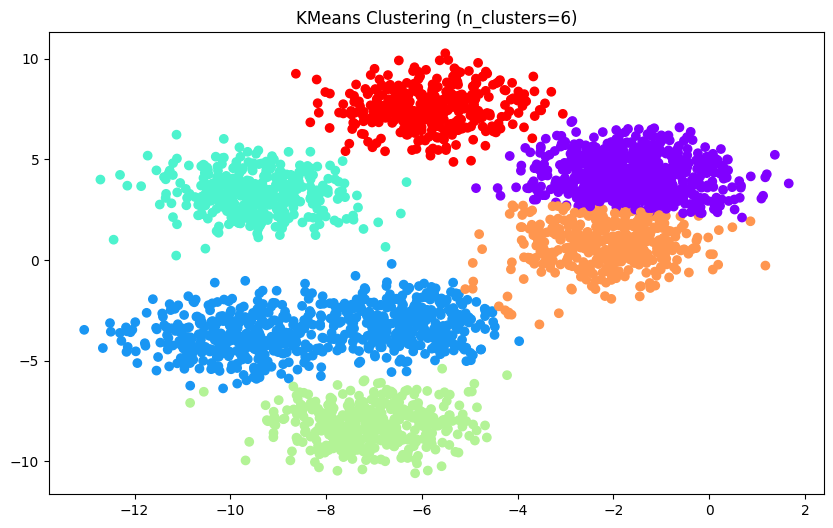

Number of clusters: 6
Within-cluster sum of squares (WSS): 8333.04857120772
Between-cluster sum of squares (BSS): 8333.04857120772
Total sum of squares (TSS): 108019.19352184644
Total sum of squared errors (SSE): 99686.14495063871
Accuracy: 0.36233333333333334
Confusion matrix:
 [[360   0   0   0  13   2   0   0]
 [  0 371   0   4   0   0   0   0]
 [  0   3   0 372   0   0   0   0]
 [  0 362   1   1  11   0   0   0]
 [ 22   0   0   0 353   0   0   0]
 [336   0   0   0  37   2   0   0]
 [  3   0   1   0   0 371   0   0]
 [  0   0 374   0   0   1   0   0]]
Classification report:
               precision    recall  f1-score   support

           0       0.50      0.96      0.66       375
           1       0.50      0.99      0.67       375
           2       0.00      0.00      0.00       375
           3       0.00      0.00      0.00       375
           4       0.85      0.94      0.89       375
           5       0.01      0.01      0.01       375
           6       0.00      0.00   

In [103]:
evaluate_clustering(X, true_y, n_clusters=6)

Here the X, and try_y remain the same as the true values and the data set but what is different is the number of clusters. Here we can see that being 6 clusters and 5 distinct little blobs.The main difference is the separation of the bottom clusters and the split in the top right. The accuracy of this classification is even lower than the K-means with a 36.2% but this classifier has the highest accuracy. The WSS is lower here but also the BSS which means that the data is closer together. With both values being equal there is not as much separation that they have with each other.

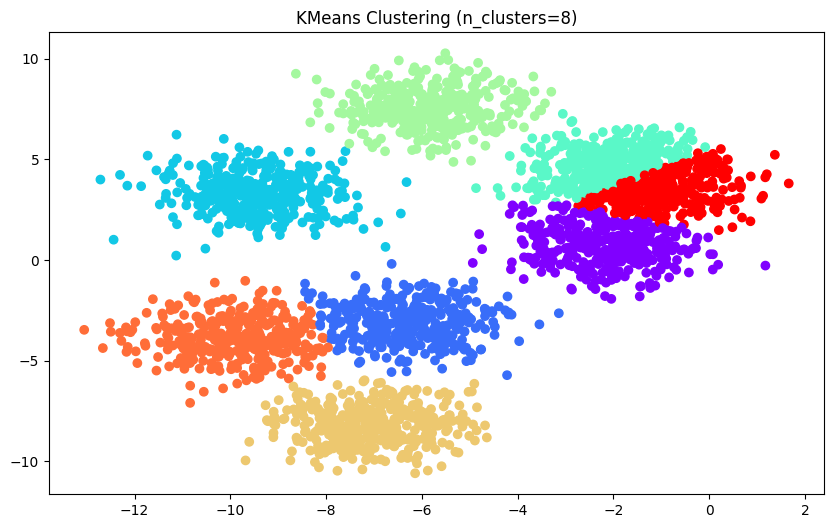

Number of clusters: 8
Within-cluster sum of squares (WSS): 5225.933241630557
Between-cluster sum of squares (BSS): 5225.933241630557
Total sum of squares (TSS): 108019.19352184644
Total sum of squared errors (SSE): 102793.26028021588
Accuracy: 0.006666666666666667
Confusion matrix:
 [[ 10   0   0 229   2   0   0 134]
 [  0  10   0   0   0   2 363   0]
 [  0   2   0   0   0 371   2   0]
 [  0 362   1   0   0   0  12   0]
 [341   0   0   5   0   0   0  29]
 [ 22   0   0 153   1   0   0 199]
 [  0   0   1   4 370   0   0   0]
 [  0   0 375   0   0   0   0   0]]
Classification report:
               precision    recall  f1-score   support

           0       0.03      0.03      0.03       375
           1       0.03      0.03      0.03       375
           2       0.00      0.00      0.00       375
           3       0.00      0.00      0.00       375
           4       0.00      0.00      0.00       375
           5       0.00      0.00      0.00       375
           6       0.00      0.0

In [104]:
evaluate_clustering(X, true_y, n_clusters=8)

Here the X, and try_y remain the same as the true values and the data set but what is different is the number of clusters. Here we can see that being 8 clusters and 5 distinct little blobs.The main difference is that what happens is that the cluster from the previous ones get split within the cluster which leads to a lower accuracy and BSS. The accuracy of this classification is even lower than the K-means with a 0.6% and this classifier has a lower accuracy accuracy. The WSS is lower here but also the BSS which means that the data is closer together. With both values being equal there is not as much separation that they have with each other. The sse also gets higher here which means a less sucesful clustering

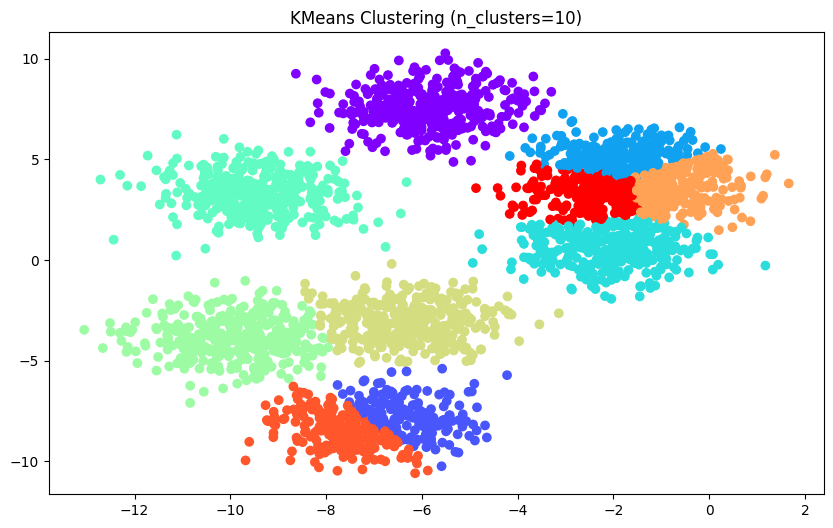

Number of clusters: 10
Within-cluster sum of squares (WSS): 4618.1140733351285
Between-cluster sum of squares (BSS): 4618.1140733351285
Total sum of squares (TSS): 108019.19352184644
Total sum of squared errors (SSE): 103401.0794485113
Accuracy: 0.0006666666666666666
Confusion matrix:
 [[  2   0 179   4   0   0   0 107   0  83]
 [  0   0   0   0   0 363  10   0   2   0]
 [  0 163   0   0   0   2   1   0 209   0]
 [  0   3   0   0   1  12 359   0   0   0]
 [  0   0   0 324   0   0   0  16   0  35]
 [  1   0  84  13   0   0   0 152   0 125]
 [370   0   4   0   1   0   0   0   0   0]
 [  1   0   0   0 374   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0]]
Classification report:
               precision    recall  f1-score   support

           0       0.01      0.01      0.01       375
           1       0.00      0.00      0.00       375
           2       0.00      0.00      0.00       375
           3       0.00      0.00      0.

In [105]:
evaluate_clustering(X, true_y, n_clusters=10)

Here the X, and true_y remain the same as the true values and the data set but what is different is the number of clusters. Here we can see that being 10 clusters and 5 distinct little blobs.The main difference is that what happens is that the cluster from the previous ones get split within the cluster which leads to a lower accuracy and BSS. The accuracy of this classification is even lower than the K-means with a 0.06% and this classifier has lowest accuracy. The WSS is lower here but also the BSS which means that the data is closer together. With both values being equal there is not as much separation that they have with each other. The SSE also gets higher here which means a less sucesful clustering because the classifier struggled to make defined boundries with data.

***
## Section: 2.3 - Record Your Observations
- What do you observe or conclude from these experiments?
- Which is your “preferred” clustering (K value in particular), and why?
- Support this with statistics and/or graphs.
***

I observe that the accuracy goes down with the BSS This is because I saw that with 6 clusters, the accuracy was at the highest and the BSS was also at the highest. But there was also still the equlity between the wss and bss which means that the classifier did struggle to separate the clusters. The accruacy was 36% which is still extremely bad but the recall was 98%. This shows that with the data being well inside it cluster, the classifier can detect it.

***
# Section: 3 - Evaluate the **K-Means** Algorithm on the **Large2** Dataset
***

***
## Section: 3.1 - Calculate True Cluster Measures
- Given that you know the true clusters (from column y in the original data), compute the true within-cluster WSS (also called “SSE” in the slides), the between-cluster BSS, and the Total SSE (WSS+BSS).
***

In [106]:
large_data2 = pd.read_csv('../Homework4/large2_Xydf.csv')
X = large_data2[['X0','X1']].to_numpy()
true_y = large_data1['y'].to_numpy()

Here I used the code evaluate_clustering because that def is the one that evaluates K-means and uses the X which is just the data and the true_y which is the true values and takes in n amount of clusters. For this first call I just used 3 in order to demonstrate how the evaluation will look like. The graph is also like one upside down parabola and another one.

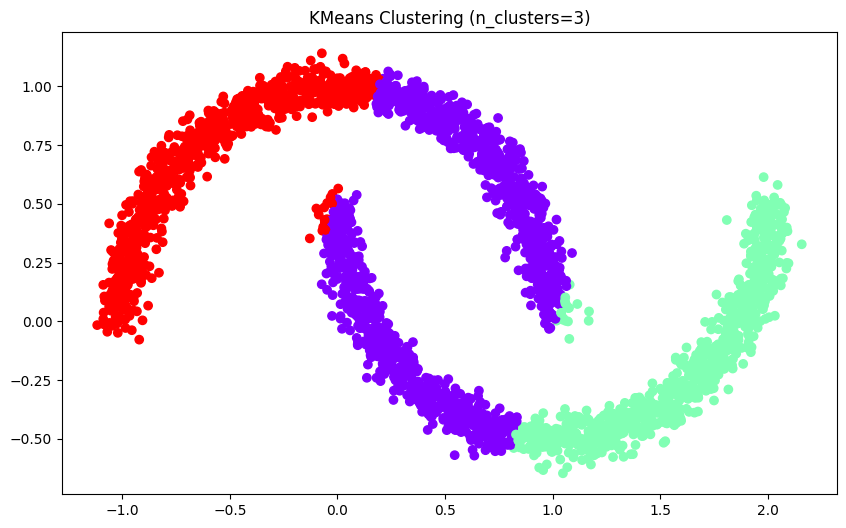

Number of clusters: 3
Within-cluster sum of squares (WSS): 806.6899684516909
Between-cluster sum of squares (BSS): 806.689968451691
Total sum of squares (TSS): 3004.6593783766584
Total sum of squared errors (SSE): 2197.9694099249673
Accuracy: 0.124
Confusion matrix:
 [[159 105 111   0   0   0   0   0]
 [164 112  99   0   0   0   0   0]
 [167 107 101   0   0   0   0   0]
 [162 114  99   0   0   0   0   0]
 [172  98 105   0   0   0   0   0]
 [161 104 110   0   0   0   0   0]
 [171 109  95   0   0   0   0   0]
 [142 103 130   0   0   0   0   0]]
Classification report:
               precision    recall  f1-score   support

           0       0.12      0.42      0.19       375
           1       0.13      0.30      0.18       375
           2       0.12      0.27      0.16       375
           3       0.00      0.00      0.00       375
           4       0.00      0.00      0.00       375
           5       0.00      0.00      0.00       375
           6       0.00      0.00      0.00     

In [107]:
evaluate_clustering(X, true_y, n_clusters=3)

***
## Section: 3.2 - Configure and Run the SciKitLearn K-Means Algorithm
- Explain all configuration parameter values you chose, and why you chose them.
- Run your algorithm for K=2, 3, 4.
- For each run:
  - Compute the WSS, BSS, and Total SSE (WSS+BSS), and compute the running time (see Python Time reference – see %%time, time.process_time(), etc.).
    Create a scatterplot, overlaying the true cluster with the cluster produced by your algorithm, or alternatively, create two separate scatterplots.
  - Create a cross tabulation matrix (i.e., confusion matrix) comparing the true and assigned clusters, and the basic measures (precision, recall, F1, accuracy, etc. - see classification_report). - Explain all configuration parameter values you chose, and why you chose them.
Note that you may need to "match up" the true and assigned cluster labels.  See the linear-sum-assignment and Hungarian algorithm references, for example.
***

Here the X, and true_y remain the same as the true values and the data set but what is different is the number of clusters. Here we can see that being 2 clusters which splits the data at a line of y = x. The accuracy of this classification is even lower than the K-means with a 12.9% and this classifier has a pretty low accuracy. The WSS is lower here but also the BSS which means that the data is closer together. With both values being equal there is not as much separation that they have with each other. The SSE also gets higher here which means a less sucesful clustering because the classifier struggled to make defined boundries with data.

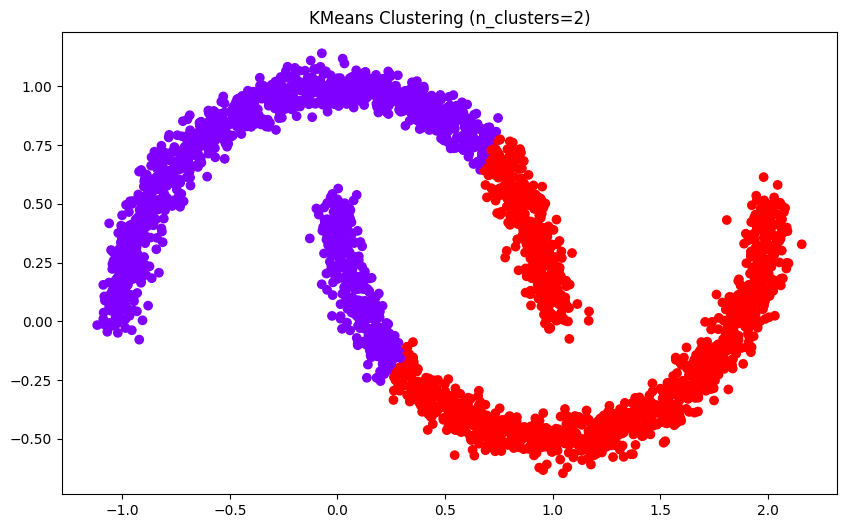

Number of clusters: 2
Within-cluster sum of squares (WSS): 1211.2851013760153
Between-cluster sum of squares (BSS): 1211.2851013760155
Total sum of squares (TSS): 3004.6593783766584
Total sum of squared errors (SSE): 1793.374277000643
Accuracy: 0.12933333333333333
Confusion matrix:
 [[190 185   0   0   0   0   0   0]
 [177 198   0   0   0   0   0   0]
 [192 183   0   0   0   0   0   0]
 [164 211   0   0   0   0   0   0]
 [185 190   0   0   0   0   0   0]
 [193 182   0   0   0   0   0   0]
 [183 192   0   0   0   0   0   0]
 [196 179   0   0   0   0   0   0]]
Classification report:
               precision    recall  f1-score   support

           0       0.13      0.51      0.20       375
           1       0.13      0.53      0.21       375
           2       0.00      0.00      0.00       375
           3       0.00      0.00      0.00       375
           4       0.00      0.00      0.00       375
           5       0.00      0.00      0.00       375
           6       0.00      0.0

In [108]:
evaluate_clustering(X, true_y, n_clusters=2)

Here the X, and true_y remain the same as the true values and the data set but what is different is the number of clusters. Here we can see that being 3 clusters which splits the data at a line of y = x and another line that passes through (0.0,0.25) and (0.1,1). The accuracy of this classification is lower than the previous one barely with a 12.4% and this classifier has a pretty low accuracy. The WSS is lower here but also the BSS which means that the data is closer together. With both values being equal there is not as much separation that they have with each other. The SSE also gets higher here which means a less sucesful clustering because the classifier struggled to make defined boundries with data.

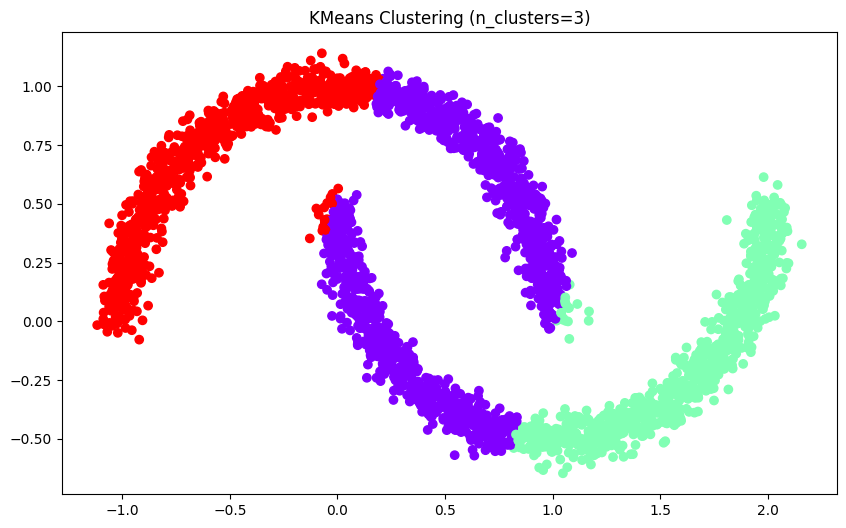

Number of clusters: 3
Within-cluster sum of squares (WSS): 806.6899684516909
Between-cluster sum of squares (BSS): 806.689968451691
Total sum of squares (TSS): 3004.6593783766584
Total sum of squared errors (SSE): 2197.9694099249673
Accuracy: 0.124
Confusion matrix:
 [[159 105 111   0   0   0   0   0]
 [164 112  99   0   0   0   0   0]
 [167 107 101   0   0   0   0   0]
 [162 114  99   0   0   0   0   0]
 [172  98 105   0   0   0   0   0]
 [161 104 110   0   0   0   0   0]
 [171 109  95   0   0   0   0   0]
 [142 103 130   0   0   0   0   0]]
Classification report:
               precision    recall  f1-score   support

           0       0.12      0.42      0.19       375
           1       0.13      0.30      0.18       375
           2       0.12      0.27      0.16       375
           3       0.00      0.00      0.00       375
           4       0.00      0.00      0.00       375
           5       0.00      0.00      0.00       375
           6       0.00      0.00      0.00     

In [109]:
evaluate_clustering(X, true_y, n_clusters=3)

Here the X, and true_y remain the same as the true values and the data set but what is different is the number of clusters. Here we can see that being 4 clusters which splits the data aint owhat looks like 3 different triangles. The accuracy of this classification is higher than the previous one barely with a 12.86% and this classifier has a pretty low accuracy but is almost as good as the classifier with 2. The WSS is lower here but also the BSS which means that the data is closer together. With both values being equal there is not as much separation that they have with each other. The SSE also gets higher here which means a less sucesful clustering because the classifier struggled to make defined boundries with data.

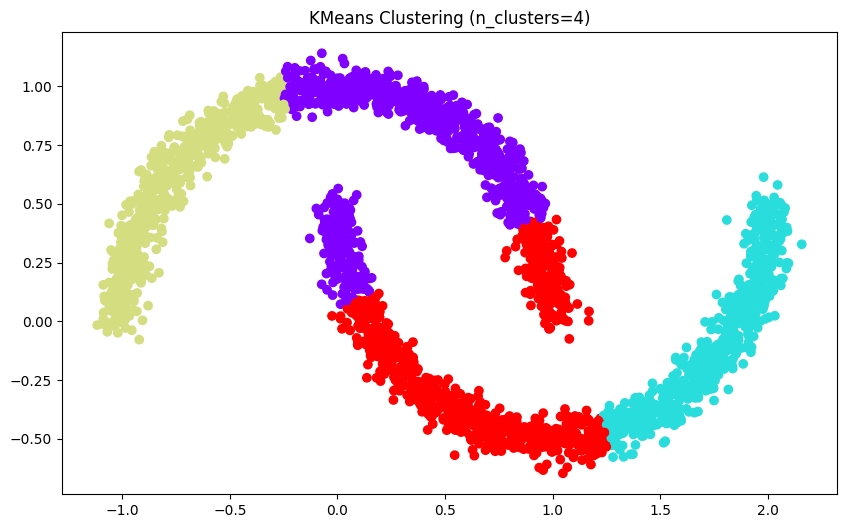

Number of clusters: 4
Within-cluster sum of squares (WSS): 524.0973101585962
Between-cluster sum of squares (BSS): 524.097310158596
Total sum of squares (TSS): 3004.6593783766584
Total sum of squared errors (SSE): 2480.5620682180624
Accuracy: 0.12866666666666668
Confusion matrix:
 [[107  79  87 102   0   0   0   0]
 [110  88  70 107   0   0   0   0]
 [109  75  78 113   0   0   0   0]
 [104  83  75 113   0   0   0   0]
 [106  73  75 121   0   0   0   0]
 [108  83  88  96   0   0   0   0]
 [109  76  66 124   0   0   0   0]
 [ 94  77  98 106   0   0   0   0]]
Classification report:
               precision    recall  f1-score   support

           0       0.13      0.29      0.18       375
           1       0.14      0.23      0.17       375
           2       0.12      0.21      0.15       375
           3       0.13      0.30      0.18       375
           4       0.00      0.00      0.00       375
           5       0.00      0.00      0.00       375
           6       0.00      0.00 

In [110]:
evaluate_clustering(X, true_y, n_clusters=4)

***
## Section: 3.3 - Record Your Observations
- What do you observe or conclude from these experiments?
- Which is your “preferred” clustering (K value in particular), and why?
- Support this with statistics and/or graphs.
***

I observed that this data had a low accuracy in general hovering around the 12% range. The reasoning behind this might be the clarity in the parabola shaped data and the classifying because the vlassifier is classifying vertically on the y axis, it is diffcult when data is similar. On top of this the splits are still on a cluster together but split in half. My preferred clustering would be the one with 2 or with 4. These has the highest accuracies and the best recalls. On top of this I have been noticing that the kmeans implementation is struggling to recognize for wss and bss because they tend to be equal.

***
# Section: 4 - Evaluate a **Second** Clustering Algorithm on the **Large2** Dataset
***

In [131]:
large_data2 = pd.read_csv('../Homework4/large2_Xydf.csv')
X = large_data2[['X0','X1']].to_numpy()
true_y = large_data1['y'].to_numpy()

***
## Section: 4.1 - Choose a Clustering Algorithm from the SciKitLearn Library  
- Explain why you chose it.
- See the SciKitLearn references.
***

I chose MeanShift because i saw that it is better with blobs yet also looked extremely similar to k-means. This being that  instead of relying on a user paramater it generates its own amount of clusters based off of the data and what would be best from what is in the data.I also found that MeanShift should be effective in general blobs or shapes that are distinct from other data points.

In [132]:
from sklearn.cluster import MeanShift, estimate_bandwidth
def evaluate_MeanShift_clustering(X, true_y):
    start_time = time.time()
    bandwidth = estimate_bandwidth(X, quantile=0.2, n_samples=500)
    ms = MeanShift(bandwidth=bandwidth, bin_seeding=True).fit(X)
    end_time = time.time()
    labels = ms.labels_

    fig, ax = plt.subplots(figsize=(10, 6))
    ax.scatter(X[:, 0], X[:, 1], c=labels, cmap='rainbow')
    ax.set_title('Mean Shift Clustering')
    plt.show()

    wss = 0 
    ssd_list = []
    for i in set(labels):
        cluster_center = np.mean(X[labels == i], axis=0)
        data_points_in_cluster = X[labels == i]
        ssd = np.sum((data_points_in_cluster - cluster_center) ** 2)
        ssd_list.append(ssd)
    bss = np.sum(ssd_list)
    tss = np.sum((X - np.mean(X, axis=0)) ** 2)
    sse = tss - bss

    acc = accuracy_score(true_y, labels)
    cm = confusion_matrix(true_y, labels)
    cr = classification_report(true_y, labels)
    runtime = end_time - start_time

    print('Number of clusters: ' + str(len(set(labels))))
    print('Within-cluster sum of squares (WSS): ' + str(wss))
    print('Between-cluster sum of squares (BSS): ' + str(bss))
    print('Total sum of squares (TSS): ' + str(tss))
    print('Total sum of squared errors (SSE): ' + str(sse))
    print('Accuracy: ' + str(acc))
    print('Confusion matrix:\n', cm)
    print('Classification report:\n', cr)
    print('Running time: ' + str(runtime) + ' seconds')


***
## Section: 4.2 - Configure and Run the Algorithm
- Do this for (at least) two variations of the configuration settings (if any).  Explain all configuration parameter values you chose, and why you chose them.
- For each run:
  - Compute the WSS, BSS, and Total SSE (WSS+BSS), and compute the running time (see Python Time reference – see %%time, time.process_time(), etc.).
    Create a scatterplot, overlaying the true cluster with the cluster produced by your algorithm, or alternatively, create two separate scatterplots.
  - Create a cross tabulation matrix (i.e., confusion matrix) comparing the true and assigned clusters, and the basic measures (precision, recall, F1, accuracy, etc. - see classification_report). - Explain all configuration parameter values you chose, and why you chose them.
Note that you may need to "match up" the true and assigned cluster labels.  See the linear-sum-assignment and Hungarian algorithm references, for example.
***

Here the X, and true_y remain the same as the true values and the data set. Here we can see that there is no clusters parameter and it is because the classifier sets it on its own iterativley. The accuracy of this classification is even lower than the K-means with a 12.9% and this classifier has a pretty low accuracy. There is no WSS in mean shift because it generates the clustering on its own and does not rely on predetermined clusters. The algorithm itreativly sets the center around the densist part of the data. The BSS Is variable now and is shown to be higher than most with 24000. The SSE does look to be a little lower than others tho.

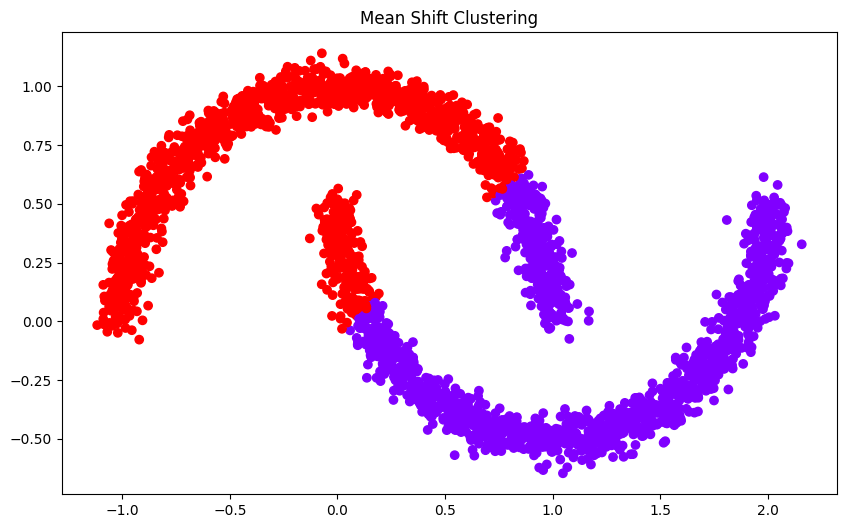

Number of clusters: 2
Within-cluster sum of squares (WSS): 0
Between-cluster sum of squares (BSS): 1266.3039293640443
Total sum of squares (TSS): 3004.6593783766584
Total sum of squared errors (SSE): 1738.3554490126141
Accuracy: 0.11833333333333333
Confusion matrix:
 [[183 192   0   0   0   0   0   0]
 [203 172   0   0   0   0   0   0]
 [194 181   0   0   0   0   0   0]
 [208 167   0   0   0   0   0   0]
 [201 174   0   0   0   0   0   0]
 [181 194   0   0   0   0   0   0]
 [209 166   0   0   0   0   0   0]
 [186 189   0   0   0   0   0   0]]
Classification report:
               precision    recall  f1-score   support

           0       0.12      0.49      0.19       375
           1       0.12      0.46      0.19       375
           2       0.00      0.00      0.00       375
           3       0.00      0.00      0.00       375
           4       0.00      0.00      0.00       375
           5       0.00      0.00      0.00       375
           6       0.00      0.00      0.00     

In [133]:
evaluate_MeanShift_clustering(X, true_y)

We see the mean generating three clusters for the density and because the BSS is relatively high it means that the clusters are realtively distinct. The WSS is zero because the clustering does not rely on anything preset. The SSE is relatively low partially due to the fact that the WSS is zero, this means that the cluster do a better job of explainging the data and the classifier did a good job. On top of this, the accuracy is still relatively low with 11% but that is worse than the K-means which had an accuracy of 36%.

***
## Section: 4.3 - Record Your Observations
- What do you observe or conclude from these experiments?
- Which is your “preferred” clustering (configuration settings, if any), and why?
- Support this with statistics and/or graphs.
***

WSS is a measure of how tightly the data points in a cluster are packed together, and BSS is a measure of how well-separated the clusters are from each other. In KMeans clustering, WSS and BSS can be computed based on the cluster centers and the assignment of data points to those centers. However, in MeanShift, the data is iterativly set around a cluster point from how the data is. We also can see that the lowering of WSS causes the SSE to be lower since it is a sum but we also see a higher BSS which means this classifier made clusters that were more distinct yet still less accurate than the previous ones. The accuracy is 11% whereas kmeans was 36% with 6 cluster. My preferred clustering configuration settings is limited because the meanShift algorithm iteratively makes its own cluster points. We cna see that the optimized amount of clusters was 3 in the graphs.

***
# Section: 5 - Evaluate a **Third** Clustering Algorithm on the **Large2** Dataset
***

***
## Section: 5.1 - Choose a Clustering Algorithm from the SciKitLearn Library  
- Explain why you chose it.
- See the SciKitLearn references.
***

I chose DBScan because it is flexible it is flexible because it does not assume a particular distribution and allows for it to see many things other classifiers cant. It is also able to detect through noise because throughout varying densities it is still accurate and able to set outliers in the data to have noisy points not be as effective. Lastly, again it has no paramter requirments which means that the algorithm constructs these itself to optimize with the data. This is all attributed because DB scane uses nearest point distance and sets them by itself.

In [134]:
large_data2 = pd.read_csv('../Homework4/large2_Xydf.csv')
X = large_data2[['X0','X1']].to_numpy()
true_y = large_data1['y'].to_numpy()

DB Scan

In [141]:
from sklearn.cluster import DBSCAN

def evaluate_DBScan(X, true_y, eps, min_samples):
    
    start_time = time.time()
    db = DBSCAN(eps=eps, min_samples=min_samples).fit(X)
    end_time = time.time()
    labels = db.labels_

    fig, ax = plt.subplots(figsize=(10, 6))
    ax.scatter(X[:, 0], X[:, 1], c=labels, cmap='rainbow')
    ax.set_title(f'DBSCAN Clustering (eps={eps}, min_samples={min_samples})')
    plt.show()

    wss = 0 
    bss = 0 
    tss = np.sum((X - np.mean(X, axis=0)) ** 2)
    sse = tss - np.sum([np.sum((X[labels == i, :] - np.mean(X[labels == i, :], axis=0)) ** 2) for i in set(labels) - {-1}])
    
    acc = accuracy_score(true_y, labels)
    cm = confusion_matrix(true_y, labels)
    cr = classification_report(true_y, labels)
    
    num_min = len(set(labels)) - (1 if -1 in labels else 0)
    noise_points = np.sum(labels == -1)
    runtime = end_time - start_time


    print('eps: ' + str(eps))
    print('min_samples: ' + str(min_samples))
    print('Total number of clusters: ' + str(num_min))
    print('Number of noise points: ' + str(noise_points))
    print('Within-cluster sum of squares (WSS): ' + str(wss))
    print('Between-cluster sum of squares (BSS): ' + str(bss))
    print('Total sum of squares (TSS): ' + str(tss))
    print('Total sum of squared errors (SSE): ' + str(sse))
    print('Accuracy: ' + str(acc))
    print('Confusion matrix:\n', cm)
    print('Classification report:\n', cr)
    print('Running time: ' + str(runtime) + ' seconds')


***
## Section: 5.2 - Configure and Run the Algorithm
- Do this for (at least) two variations of the configuration settings (if any).  Explain all configuration parameter values you chose, and why you chose them.
- For each run:
  - Compute the WSS, BSS, and Total SSE (WSS+BSS), and compute the running time (see Python Time reference – see %%time, time.process_time(), etc.).
    Create a scatterplot, overlaying the true cluster with the cluster produced by your algorithm, or alternatively, create two separate scatterplots.
  - Create a cross tabulation matrix (i.e., confusion matrix) comparing the true and assigned clusters, and the basic measures (precision, recall, F1, accuracy, etc. - see classification_report). - Explain all configuration parameter values you chose, and why you chose them.
Note that you may need to "match up" the true and assigned cluster labels.  See the linear-sum-assignment and Hungarian algorithm references, for example.
***

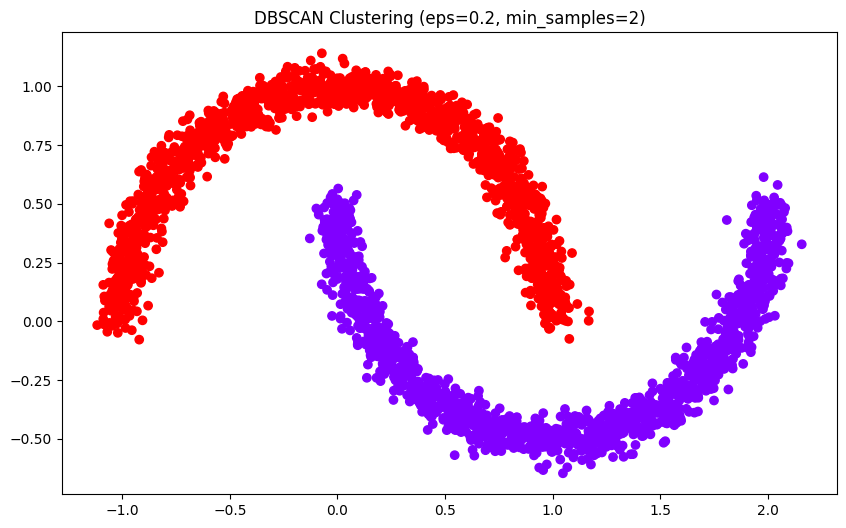

eps: 0.2
min_samples: 2
Total number of clusters: 2
Number of noise points: 0
Total sum of squares (TSS): 3004.6593783766584
Total sum of squared errors (SSE): 1204.7933141689343
Accuracy: 0.12433333333333334
Confusion matrix:
 [[185 190   0   0   0   0   0   0]
 [187 188   0   0   0   0   0   0]
 [195 180   0   0   0   0   0   0]
 [194 181   0   0   0   0   0   0]
 [182 193   0   0   0   0   0   0]
 [179 196   0   0   0   0   0   0]
 [204 171   0   0   0   0   0   0]
 [174 201   0   0   0   0   0   0]]
Classification report:
               precision    recall  f1-score   support

           0       0.12      0.49      0.20       375
           1       0.13      0.50      0.20       375
           2       0.00      0.00      0.00       375
           3       0.00      0.00      0.00       375
           4       0.00      0.00      0.00       375
           5       0.00      0.00      0.00       375
           6       0.00      0.00      0.00       375
           7       0.00      0.00 

In [142]:
#eps = 0.2, sample size is 2
evaluate_DBScan(X, true_y, 0.2, 2)

Here the paramaters are X, True y, ep, and minimum samples. eps is to measure the distance to consider whether or not the points there are neighbors. Depending how large eps is it will dictate how large a point can have neighbors.Min-samples are the minimum amount of points required in order to be considered within a neighborhood. I chose 0.2 because this allowed for a lower threshhold and worked well with the min samples being 2. This is that there is basically 2 clusters with the neighborhoods of having an epsilon of 0.2. If I had chosen 0.3, there would be more neighborhoods given the samples. I wanted to depict a split for 2 samples in the 2 densist areas so this is what i chose.

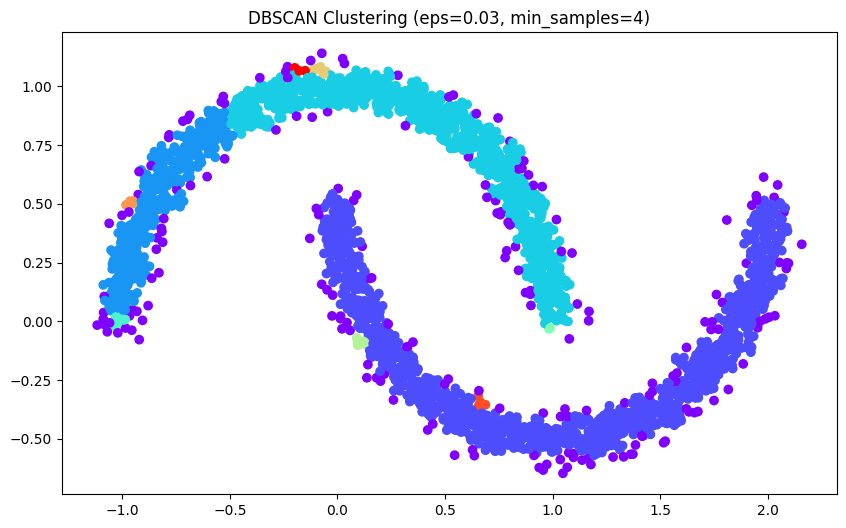

eps: 0.03
min_samples: 4
Total number of clusters: 10
Number of noise points: 196
Total sum of squares (TSS): 3004.6593783766584
Total sum of squared errors (SSE): 1848.5217937847838
Accuracy: 0.108
Confusion matrix:
 [[  0   0   0   0   0   0   0   0   0   0   0]
 [ 22 169  63 115   2   2   0   0   0   2   0]
 [ 33 166  42 128   2   0   0   1   0   1   2]
 [ 18 188  54 111   2   0   0   1   1   0   0]
 [ 28 178  53 112   1   0   2   0   1   0   0]
 [ 21 167  52 131   0   0   1   2   0   1   0]
 [ 20 170  66 116   0   0   0   2   0   0   1]
 [ 27 185  50 108   1   1   2   0   1   0   0]
 [ 27 161  65 118   0   0   2   1   1   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0]]
Classification report:
               precision    recall  f1-score   support

          -1       0.00      0.00      0.00         0
           0       0.12      0.45      0.19       375
           1       0.09      0.11      0.10       375
           2       0.12

In [143]:
#eps = 0.03, sample size is 4
evaluate_DBScan(X, true_y, 0.03, 4)

Here the paramaters are X, True y, ep, and minimum samples. eps is to measure the distance to consider whether or not the points there are neighbors. Depending how large eps is it will dictate how large a point can have neighbors.Min-samples are the minimum amount of points required in order to be considered within a neighborhood. I chose 0.3 because this allowed for a lower threshhold and more neighbors. WHat allowed for the most neighborhoods was the sample count which was 4. In the graph, you can se in certain densities there are 4 different types. All of which allow for neighborhoods and clustering.I chose 4 as the min samples because i wanted to demonstrate more clusters and how the algorithm would cluster more data. This is also applicable to the epsilon values so I wanted to change the threshhold to demonstrate the effect.

***
## Section: 5.3 - Record Your Observations
- What do you observe or conclude from these experiments?
- Which is your “preferred” clustering (configuration settings, if any), and why?
- Support this with statistics and/or graphs.
***

What I observed was that the more variances and samples you gave the classifier, the noiser and ambigous it got. With the one with just 2 clusters it was 0 for noise areas but the one with 4 samples gave 10 clusters and was extremely noisy. On top of this the SSE was significantly lower with the 2 sample one with 12000 compared to 1800. Another factor is the value of eps, it can have a significant impact on the clustering results. A small value of eps may result in many small clusters or many points being marked as noise. A large value of eps may result in all points being placed in a single cluster. The optimal value of eps depends on the data being analyzed and must be chosen carefully.This could be because with less noise and more distinction, there is less variance and on top of that there was a better accuracy rate on the setting of 0.2 as the epsilon and 2 as the min samples. That is the configuration I would have chosen. 

***
# Section: 6 - Comparison of the Three Clustering Algorithms on the **Large2** Dataset
***

***
## Section: 6.1 - Compare Their Performance
- What was their relative performance (quality and timing), and their performance versus the true clustering?
- What characteristics of the data might impact the clustering algorithms' performance?
***

The relative performance of the quality was not as good as the treu clustering. With most of the clustering methods having a below 40% accuracy and the recall and precision rates where everywhere. Regarding K-means, the aspect that could prove challening or high impact would be the complexity of the data. We saw that with the smaller data the numbers and statistics were better with a 60% accuracy but once we got to the larger data sets, the accuracy dropped to 36%. On top of that outliers and noise can displace the given central points given for the k-means. With regards to meanShift, the density of the data would have the highest impact. This is because with meanshift, the algorithm does all of the central points by itself so having any outliers would skew the central points. On top of this data with unpredicatble densities or even desnities would be difficult to cluster. Regarding DBSCAN, the largest factors would be the paramaters but in the data I would say it would also be the density.

***
## Section: 6.2 - Choose a Best Clustering Algorithm
- Choose one of the three clustering algorithm as best and explain why.
***

The best one of the three would be K-means. Since it is a centorid based algorithm and the user input does not have as much effect on the output as DBSCAN because eps and min samples vary the output a lot. There is an even variance in K-means. On top of this, the data shape was more regular and distinct. This leads to another advantage with K-means beause the algorithm is better at identifying distinct shapes. On top of this the K-means algorithm had the best accuracies across all data and did have some higher variance but that is because in meanSHift, the algorithm does everything for you which lowers the variance. There is also no WSS in meanshift and in DBSCAN there is neither WSS or BSS. We also saw the most distinct clusters in K-means with relatively higher BSS rates but the one downside was that once, you got past the most amount of distinct clusters, the accuracy rapidly fell.

***
# Section: 7 - Conclusions
- Write a paragraph on what you discovered or learned from this homework.
***

From this homework I discovered how complex different types of clustering are so specific and powerful in the right scenarios. Eahc algorithm has pros and cons and the usability level can highly effec thow effective that algorithm is on your data. For example the k-means is fairly straight forward so it is good on simpler sets but with DBSCAN, if you do not understand eps or the min-samples needed or you cannot find the most efficient parametes for the algorithm, then algorithm is nearly useless and does not provide you wiht useful data. On top of this, I was able to get a breath of many types of clustering algorithms and see how they work on different data sets using statistic and modeling to plot my results. It was cool to see how on the same data set, you can plot and cluster the values vastly different ways when it is just one set of data.

***
### END-OF-SUBMISSION
***